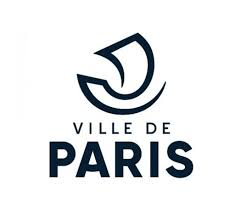
# <center><font color=red>Challenge Data Paris : "Végétalisons la ville"</font></center><br>

Depuis l'année 2015, la ville de Paris communique largement sur son plan stratégique "**Ville intelligente et durable**", qui contribuera à faire de la ville de Paris **une smart city** d'ici 2050. Un des 3 volets de ce plan concerne la "**Ville Ingénieuse**", c'est-à-dire, une ville qui réinterroge le fonctionnement des réseaux, des aménagements et des flux urbains afin d’optimiser et d’économiser les ressources.

Le programme **Végétalisons la ville** fait partie du volet "**Ville ingénieuse**", et est géré par la **DEVE** - la *Direction des Espaces Verts Et de l'Environnement*. Dans ce cadre, la ville de Paris sponsorise un <font color=blue>challenge Data</font> ayant pour objectif d'aider la ville à **optimiser les tournées d'entretien de ses arbres**.

**<center><font color=green>MISSION</font></center>**<br> 
Notre mission est d'explorer le jeu de données portant sur le patrimoine arboré de la ville de Paris, afin d'apporter une analyse pertinente permettant de **réduire le nombre de tournées (donc de trajet), tout en augmentant le nombre d'arbres entretenus**. 

**<center><font color=green>ENVIRONNEMENT DE TRAVAIL</font></center>**<br> 
L'environnement de développement a été installé via la distribution <code>**Anaconda**</code>, intégrant en natif :
- le langage de programmation <code>**Python**</code>, très bien adapté pour l'analyse de données ,
- et également le cahier électronique <code>**Jupyter Notebook**</code>, qui permet de rassembler dans un même document du texte, des images et du code informatique exécutable et manipulable dans un navigateur web .<br>

Un **environnement virtuel** dédié à ce challenge a été créé dans <code>**Anaconda**</code> pour assurer l'isolement du projet et la gestion des dépendances.

**<center><font color=green>METHODOLOGIE</font></center>**<br> 
Afin de bien comprendre notre jeu de données et d'en faire une synthèse appropriée, nous réaliserons une <font color=blue>analyse de données exploratoire en utilisant les librairies Python</font>, en faisant appel à l'<font color=blue>analyse statistique univariée</font>.

**<center><font color=green>SOMMAIRE</font></center>**<br> 
Cette analyse se découpera en <font color=blue>3 grandes parties</font> :
- La **présentation générale** du jeu de données ;
- L'exposé de la **démarche méthodologique** d'analyse;
- Une **synthèse**.

<hr>

Une première étape consiste en l'**importation des librairies <code>Python</code>** nécessaires à notre analyse dans le <code>**Jupyter Notebook**</code> : <br>
<code>**NumPy, Pandas, Matplotlib, Seaborn, Missingno**</code>.

***

Nous créons également un **répertoire source de travail** pour rassembler tous les données d'entrée et de sortie à un seul endroit.

In [1]:
# -*- coding: uft-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import iqr

# Affiche directement les graphiques sur le notebook sans ouvrir une fenêtre à part
%matplotlib inline 
sns.set(style="white", palette="muted", color_codes=True) # Configuration d'affichage de Seaborn

import os
os.chdir("C:/Users/LaFamille/Documents/_Ingénieur IA/Projet 2/")
print(os.listdir())

['p2-arbres-fr.csv', 'P2_01_Notebook.ipynb', 'P2_02_Présentation.pptx']


## <center><font color=red>PARTIE 1 - Présentation générale du jeu de données</font></center>

Le **jeu de données** portant sur le patrimoine arboré de la ville de Paris est disponible sur ce lien : <a>[opendata.paris.fr](https://opendata.paris.fr/explore/dataset/les-arbres/information/?disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable)</a>.

Dans cette 1ère partie, nous allons **établir le profil** du jeu de données : c'est un processus qui nous aide à avoir un <font color=blue>aperçu</font> des données à notre disposition.

Nous utilisons la librairie <code>**Pandas**</code> pour l'**importation** du fichier texte "**p2-arbres-fr.csv**" afin de le charger vers un <code><font color=blue>*DataFrame*</font></code>, que nous appelerons **<code><font color=red>df0</font></code>**. Un *DataFrame* est une structure de données ressemblant à un tableau en 2 dimensions, incluant des lignes (<code>axis=0</code>) et des colonnes (<code>axis=1</code>).

Nous pouvons immédiatement afficher les 5 premières lignes de notre *DataFrame* avec <code>head()</code>, afin d'avoir un 1er aperçu du contenu de notre jeu de données et de vérifier si les données ont bien été chargées.

In [2]:
# Lecture du jeu de données (.csv)
df0 = pd.read_csv("p2-arbres-fr.csv", sep = ";", encoding = "utf-8")

# Affichage des 5 premières lignes et vérification du chargement des données
df0.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


### <center><font color=green>Sous-Partie 1.1 - Inspection du jeu de données </font></center>

Pour décrire notre jeu de données, nous allons utiliser une **fonction** - c'est-à-dire une suite d'instructions, nommée <code>tableau_synthese</code>, qui nous permettra de faire une <font color=blue>synthèse générale</font> apportant :
- une **vue d'ensemble** concernant le jeu de données, 
- et des **indicateurs** portant sur toutes les variables (colonnes).

Les indicateurs sont les suivants :
- le <font color=blue>nombre total de colonnes et de lignes</font> pour le jeu de données ;
- le comptage des <font color=blue>valeurs uniques</font> par colonne (*y compris les valeurs manquantes*) ;
- le nombre de <font color=blue>valeurs non-nulles</font> par colonne ;
- le <font color=blue>nombre et le pourcentage de valeurs manquantes</font> par colonne;
- le <font color=blue>nombre et le pourcentage de valeurs à zéro</font> par colonne ;
- le <font color=blue>type de données</font> pour chaque colonne.

In [3]:
# Résumé des données par colonne avec une fonction spécifique
def tableau_synthese(df0):
        # Valeurs calculées pour chaque colonne
        val_unique = df0.nunique(dropna=False) # Nb Valeurs uniques, y compris les valeurs manquantes
        val_non_nulle = df0.count(axis=0) # Nb de valeurs Non-nulles
        val_manq = df0.isnull().sum() # Nb de valeurs manquantes
        val_manq_pourcent = 100 * df0.isnull().sum() / len(df0) # % de valeurs manquantes
        val_zero = (df0 == 0.00).astype(int).sum(axis=0) # Nb de valeurs à zéro
        val_zero_pourcent = 100 *((df0 == 0.00).astype(int).sum(axis=0)) / len(df0)
        # Création d'une table de donnée ayant pour colonne les valeurs calculées
        ts_table = pd.concat([val_unique, val_non_nulle, val_manq, val_manq_pourcent, val_zero, \
                              val_zero_pourcent], axis=1)
        # Libellés explicites pour chaque colonne
        ts_table = ts_table.rename(
        columns = {0 : "Valeurs uniques", 1 : "Valeurs non-nulles", 2 : "Valeurs manquantes", \
                   3 : "% Manquants vs Total", 4 : "Valeurs à zéro", 5 : "% Zéro vs Total"})
        # Ajout de la colonne de type de données à la table de données
        ts_table['Type Données'] = df0.dtypes
        # Création d'un filtre sur les valeurs manquantes
        filtre_vm = ts_table[ts_table["Valeurs manquantes"] != 0]
        # Tri décroissant sur la colonne "Valeurs manquantes"
        ts_table = ts_table[
            ts_table.iloc[:,0] != 0].sort_values("% Manquants vs Total", ascending=False).round(1)
        # Afficher le nombre de colonnes et de lignes au total et le nombre de colonnes avec vlr manquantes
        print ("Le DataFrame a " + str(df0.shape[1]) + " colonnes et " \
               + str(df0.shape[0]) + " lignes (y compris les en-têtes).\n"      
            "Il y a " + str(filtre_vm.shape[0]) +
              " colonnes ayant des valeurs manquantes.")
        return ts_table

# Appel de la fonction sur le DataFrame
tableau_synthese(df0)

Le DataFrame a 18 colonnes et 200137 lignes (y compris les en-têtes).
Il y a 9 colonnes ayant des valeurs manquantes.


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Manquants vs Total,Valeurs à zéro,% Zéro vs Total,Type Données
numero,1,0,200137,100.0,0,0.0,float64
complement_addresse,3796,30902,169235,84.6,0,0.0,object
variete,437,36777,163360,81.6,0,0.0,object
stade_developpement,5,132932,67205,33.6,0,0.0,object
remarquable,3,137039,63098,31.5,136855,68.4,float64
espece,540,198385,1752,0.9,0,0.0,object
libelle_francais,193,198640,1497,0.7,0,0.0,object
genre,176,200121,16,0.0,0,0.0,object
domanialite,10,200136,1,0.0,0,0.0,object
circonference_cm,531,200137,0,0.0,25867,12.9,int64


Nous pouvons également afficher <font color=blue> les valeurs manquantes dans un graphique en barres</font> avec la librairie <code>**Missingno**</code>.

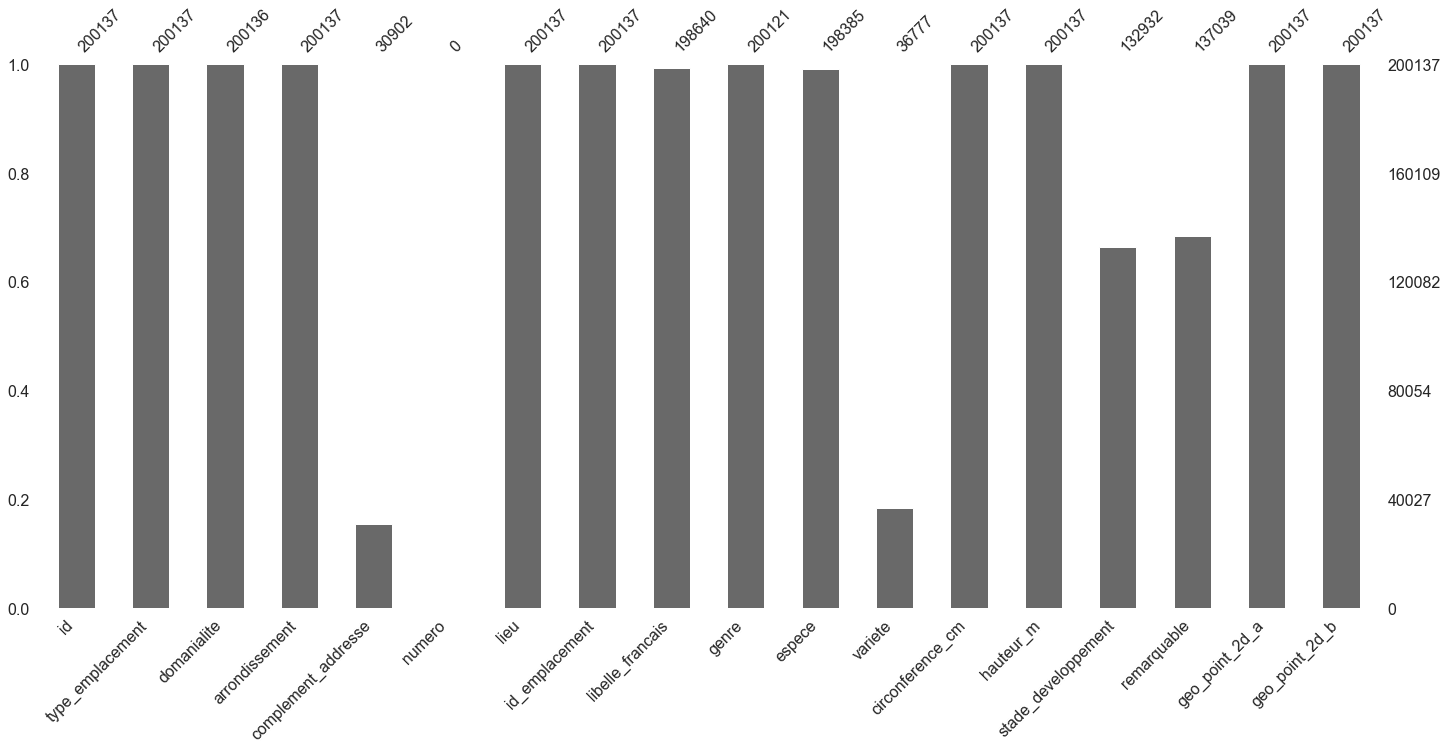

In [4]:
# Visualisation du nombre de données manquantes par colonne avec la librairie missingno
msno.bar(df0)

### <center><font color=green>Sous-Partie 1.2 - Synthèse du jeu de données </font></center>

Nous avons terminé notre inspection du **jeu de données portant sur le patrimoine arboré** de la ville de Paris et en résumé, nous pouvons en conclure les caractéristiques suivantes :
- <font color=blue>200.136 lignes (hors en-têtes)</font>, décrites par <font color=blue>18 variables en colonne</font> ;
- <font color=blue>11 variables qualitatives</font> (<code>object</code>) et <font color=blue>7 variables quantitatives</font> (<code>float64, int64</code>) ;
- <font color=blue>9 variables</font> **NE présentant PAS** de <font color=blue>valeurs manquantes</font> ;
- <font color=blue>9 variables</font> **présentant** des <font color=blue>valeurs manquantes</font> ;
- <font color=blue>3 variables</font> **présentant** des <font color=blue>valeurs à zéro</font> ;
- <font color=blue>1 variable</font> <code>(type_emplacement)</code>contenant une <font color=blue>donnée unique</font> ;
- <font color=blue>1 variable</font> <code>(numero)</code> ne contenant <font color=blue>aucune donnée</font>.

***

## <center><font color=red>PARTIE 2 - Démarche méthodologique d'analyse </font></center>

La démarche d'<font color=red>**analyse de données exploratoire**</font> (ou analyse descriptive) est un travail itératif en 3 phases :
- <font color=blue>Observation de la donnée</font> afin de se familiariser avec ses caractéristiques ;
- <font color=blue>Nettoyage de la donnée</font> suite à l'identification de valeurs manquantes ou aberrantes ;
- <font color=blue>Analyse</font> de la donnée, incluant la visualisation sur un <font color=blue>graphique</font>.

Pour ce projet en particulier, notre démarche d'analyse fera appel **exclusivement** à la **<font color=red>statistique descriptive univariée</font>** : cela veut dire que les observations que nous ferons des variables de notre jeu de données - qu'elles soient qualitatives ou quantitatives, se feront de manière **isolée, une par une, sans chercher à établir un lien** éventuel entre ces différentes variables, tout en repérant les anomalies.

Cette 2e partie comportera donc 2 sous-parties :
> 1. L'identification des données essentielles à notre analyse ;
> 2. L'analyse de données exploratoire pour chacune des variables retenues pour l'analyse.

### <center><font color=green>Sous-Partie 2.1 - Identification des données essentielles à l'analyse </font></center>

Le choix des variables à retenir se base essentiellement sur l'objectif à atteindre, c'est-à-dire, **optimiser les tournées d'entretien des arbres de la Ville**. 

Pour cela, nous avons besoin de données :
- d'**identification et de spécificité** du type d'arbre : nous prendrons les variables <code>libelle_francais</code>,  <code>stade_developpement</code> et <code>remarquable</code> ; 
- de **localisation** : nous prendrons <code>domanialite</code>, <code>arrondissement</code>, <code>geo_point_2d_a</code> et <code>geo_point_2d_b</code>;
- de **mensurations** : nous prendrons les données quantitatives <code>circonference_cm</code> et <code>hauteur_m</code>.

Chacune de ces variables nous aidera à **apporter des recommandations quant aux types d'entretien nécessaires, probablement leur fréquence, le matériel d'entretien, etc.**.

Dans les étapes ci-dessous, nous allons :
- éliminer les colonnes non-retenues pour l'analyse ;
- clarifier l'intitulé des variables et les mettre en majuscules ; 
- et les réordonner pour des raisons esthétiques.

Nous appelerons ce ***DataFrame* réduit** : **<code><font color=red>df1</font></code>**.

In [5]:
# Suppression des colonnes inutiles à l'analyse
df1 = df0.drop(["id","type_emplacement","complement_addresse",\
                        "numero","lieu","id_emplacement","genre","espece","variete"], axis=1)

# Modification du format des libellés des colonnes (mis en lettres capitales)
df1.rename(columns = {"domanialite":"DOMANIALITE","arrondissement":"ARRONDISSEMENT",\
                        "libelle_francais":"LIBELLE_FR", \
                        "circonference_cm":"CIRCONF_CM","hauteur_m":"HAUTEUR_M",\
                        "stade_developpement":"STADE_DEVPT","remarquable":"REMARQUABLE",\
                        "geo_point_2d_a":"LATITUDE","geo_point_2d_b":"LONGITUDE"}, inplace = True)

# Réordonnancement des libellés des colonnes
df1 = df1.reindex(columns = ["LIBELLE_FR", \
                                     "STADE_DEVPT","REMARQUABLE",\
                                     "DOMANIALITE","ARRONDISSEMENT","LATITUDE","LONGITUDE",\
                                     "CIRCONF_CM","HAUTEUR_M"])

df1.head() # Affichage des 5 premières lignes

,LIBELLE_FR,STADE_DEVPT,REMARQUABLE,DOMANIALITE,ARRONDISSEMENT,LATITUDE,LONGITUDE,CIRCONF_CM,HAUTEUR_M
0,Marronnier,NaN,0.0,Jardin,PARIS 7E ARRDT,48.857620,2.320962,20,5
1,If,A,NaN,Jardin,PARIS 7E ARRDT,48.857656,2.321031,65,8
2,If,A,NaN,Jardin,PARIS 7E ARRDT,48.857705,2.321061,90,10
3,Erable,A,NaN,Jardin,PARIS 7E ARRDT,48.857722,2.321006,60,8
4,Arbre à miel,NaN,NaN,Jardin,PARIS 17E ARRDT,48.890435,2.315289,38,0


In [6]:
# Vérification des données du nouveau DataFrame avec la fonction tableau_synthèse
def tableau_synthese(df1):
        # Valeurs calculées pour chaque colonne
        val_unique = df1.nunique() # Nb Valeurs uniques !!! Hors valeurs manquantes cette fois !!!
        val_non_nulle = df1.count(axis=0) # Nb de valeurs Non-nulles
        val_manq = df1.isnull().sum() # Nb de valeurs manquantes
        val_manq_pourcent = 100 * df1.isnull().sum() / len(df1) # % de valeurs manquantes
        val_zero = (df1 == 0.00).astype(int).sum(axis=0) # Nb de valeurs à zéro
        val_zero_pourcent = 100 *((df1 == 0.00).astype(int).sum(axis=0)) / len(df1)
        # Création d'une table de donnée ayant pour colonne les valeurs calculées
        ts_table = pd.concat([val_unique, val_non_nulle, val_manq, val_manq_pourcent, val_zero, \
                              val_zero_pourcent], axis=1)
        # Libellés explicites pour chaque colonne
        ts_table = ts_table.rename(
        columns = {0 : "Valeurs uniques", 1 : "Valeurs non-nulles", 2 : "Valeurs manquantes", \
                   3 : "% Manquants vs Total", 4 : "Valeurs à zéro", 5 : "% Zéro vs Total"})
        # Ajout de la colonne de type de données à la table de données
        ts_table['Type Données'] = df1.dtypes
        # Création d'un filtre sur les valeurs manquantes
        filtre_vm = ts_table[ts_table["Valeurs manquantes"] != 0]
        # Tri décroissant sur la colonne "Valeurs manquantes"
        ts_table = ts_table[
            ts_table.iloc[:,0] != 0].sort_values("% Manquants vs Total", ascending=False).round(1)
        # Afficher le nombre de colonnes et de lignes au total et le nombre de colonnes avec vlr manquantes
        print ("Le DataFrame a " + str(df1.shape[1]) + " colonnes et " \
               + str(df1.shape[0]) + " lignes.\n"      
            "Il y a " + str(filtre_vm.shape[0]) +
              " colonnes ayant des valeurs manquantes.")
        return ts_table

# Appel de la fonction sur le DataFrame
tableau_synthese(df1)

Le DataFrame a 9 colonnes et 200137 lignes.
Il y a 4 colonnes ayant des valeurs manquantes.


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Manquants vs Total,Valeurs à zéro,% Zéro vs Total,Type Données
STADE_DEVPT,4,132932,67205,33.6,0,0.0,object
REMARQUABLE,2,137039,63098,31.5,136855,68.4,float64
LIBELLE_FR,192,198640,1497,0.7,0,0.0,object
DOMANIALITE,9,200136,1,0.0,0,0.0,object
ARRONDISSEMENT,25,200137,0,0.0,0,0.0,object
LATITUDE,200107,200137,0,0.0,0,0.0,float64
LONGITUDE,200114,200137,0,0.0,0,0.0,float64
CIRCONF_CM,531,200137,0,0.0,25867,12.9,int64
HAUTEUR_M,143,200137,0,0.0,39219,19.6,int64


Notre nouveau *DataFrame* **<code><font color=red>df1</font></code>** contient actuellement <font color=blue>9 variables</font> (au lieu de 18).

***

### <center><font color=green>Sous-Partie 2.2 - Analyse exploratoire des données</font></center>

Avant d'aller plus en avant, faisons le point sur le **<font color=red>nettoyage de données</font>**.

C'est l'opération de **détection et de correction (voire de  suppression) d'erreurs** présentes sur des données stockées dans notre jeu de données : c'est **l'étape la plus importante** avant l'analyse ou la modélisation des données. En effet, utiliser des données incomplètes ou inconsistentes peut biaiser l'analyse et/ou le modèle.

L'**objectif de cette étape fondamentale** est d'améliorer la cohérence, la fiabilité et la valeur des données, afin de **prendre des décisions avisées et de définir des stratégies efficaces**.

Pour chacune des données que nous allons étudier ci-après, nous appliquerons 3 actions :
- <font color=blue>Observer la donnée afin de détecter les problèmes potentiels ;
- Choisir le type de traitement à appliquer : aucun traitement, correction/remplacement ou suppression ;
- Afficher la donnée sur un graphique.</font>

### <center><font color=purple>2.2.1 - Nettoyage des données QUALITATIVES</font></center>

**<center><font color=red>Variable étudiée : LIBELLE_FR</font></center>**

> Pour rappel, nous avons observé pour cette variable :
- **193 valeurs uniques** ;
- **1.497 valeurs manquantes**.
<br><br>
Sachant qu'un arbre qu'on ne peut identifier n'apporte pas d'analyse pertinente, nous allons donc :
- filtrer les lignes des libellés pour **garder uniquement les valeurs non nulles** ;
- afficher la liste complète des valeurs uniques pour **vérifier s'il reste des données à traiter**.

In [7]:
# Filtrage du df en supprimant les valeurs nulles
df1 = df1[df1["LIBELLE_FR"].notnull()]
print("Le DataFrame a " + str(df1.shape[0]) + " lignes (au lieu de " + str(df0.shape[0]) +").\n"
      "Il y a " + str(df1["LIBELLE_FR"].nunique()) + " valeurs uniques pour la variable LIBELLE_FR.")

Le DataFrame a 198640 lignes (au lieu de 200137).
Il y a 192 valeurs uniques pour la variable LIBELLE_FR.


In [8]:
# Affichage du nombre de valeurs nulles
libelles = df1["LIBELLE_FR"].unique()
libelles.sort() # Nous ne pouvons faire de tri que sur les listes
libelles

array(['Abelia', 'Abricotier', 'Ailante', 'Alangium', 'Alisier', 'Althéa',
       'Amandier', 'Amla', 'Amélanchier', 'Andromède', 'Angélique',
       'Araucaria', 'Arbousier', 'Arbre aux mouchoirs',
       'Arbre aux quarante écus', 'Arbre de Judée',
       'Arbre à Gutta-Percha', 'Arbre à caramel', 'Arbre à miel',
       'Arbre à perruque', 'Arbre à soie', 'Argousier', 'Aronie',
       'Asiminier', 'Aubepine', 'Aubépine', 'Aulne', 'Bouleau', 'Buis',
       'Cabrillet', 'Callistemon', 'Camphrier', 'Caragana', 'Caryer',
       'Catalpa', 'Cedrele', 'Cerisier à fleurs', 'Cerisier à fruits',
       'Cerisier à grappes', 'Charme', 'Charme-Houblon',
       'Chicot du Canada', 'Chimonanthe', 'Chitalpa', 'Châtaignier',
       'Chèvrefeuille', 'Chêne', 'Citronnier', 'Clerodendron',
       'Cognassier', 'Copalme', 'Cordyline', 'Cormier', 'Cornouiller',
       'Cotoneaster', 'Cryptomeria', 'Cunninghamia', 'Cyprès',
       'Cyprès Chauve', 'Cytise', 'Cèdre', 'Céphalotaxe', 'Distylium',
       'El

> Il semble que nos données soient nettoyées.
<br><br>
Avant de représenter graphiquement "**LIBELLE_FR**", comme nous savons qu'il y a plus de 100 entrées, nous allons faire un autre <font color=blue>retraitement des données</font> pour **n'afficher que le top 10 et regrouper toutes les autres entrées dans "Autres"**.
<br><br>
Pour cela :
- On fait un filtre sur ces petites valeurs (les entrées qui ne font pas partie du top 10) ;
- On crée un fonction qui remplace ces petites valeurs en "Autres" ;
- Puis, on crée un nouvelle colonne **LIBELLE_FR_NEW** constitué par le top 10, plus les "Autres".
<br><br>
Ensuite, nous pouvons <font color=blue>représenter graphiquement</font> les données de la nouvelle variable **LIBELLE_FR_NEW** dans un **diagramme circulaire**.

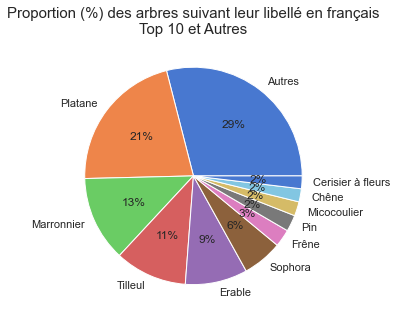

In [9]:
# Création d'une série qui prend en compte uniquement les libelles en dehors du top 10
libelle_count = df1["LIBELLE_FR"].value_counts()
rare_libelle = libelle_count[libelle_count < libelle_count.sort_values(ascending=False)[9]]

# Création d'une fonction qui remplace les libelles "rares" par "Autres"
def replace_with_others (row, rare_libelle):
    if row in rare_libelle: return "Autres"
    return row

# Création d'une nouvelle colonne sur laquelle on applique la fonction qui prend la liste comme argument
df1["LIBELLE_FR_NEW"] = df1["LIBELLE_FR"].apply(replace_with_others, args=[list(rare_libelle.index)])

# Représentation graphique
plt.figure(figsize=(10,5))
df1["LIBELLE_FR_NEW"].value_counts().plot.pie(autopct="%1.0f%%")
plt.title("Proportion (%) des arbres suivant leur libellé en français\nTop 10 et Autres", fontsize=15)
plt.ylabel("")
plt.show()

**<center><font color=red>Variable étudiée : DOMANIALITE</font></center>**

> Pour rappel, nous avons observé pour cette variable :
- **10 valeurs uniques dont, 1 valeur manquante**.
<br><br>
Affichons ces valeurs uniques.

In [10]:
# Affichage des valeurs uniques
df1["DOMANIALITE"].unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

> Nous allons d'abord **uniformiser le format des données** en les mettant toutes en majuscules (lettres capitales). 
<br><br>
Ensuite, nous retirons la ligne dont la valeur est nulle.
<br><br>
Enfin, nous représenterons graphiquement la donnée dans un **diagramme en barre horizontal**.

In [11]:
# Uniformisation du format des entrées en les mettant en majuscules
df1["DOMANIALITE"] = df1["DOMANIALITE"].str.upper()

# Filtre sur les valeurs non-nulles
df1 = df1[df1["DOMANIALITE"].notnull()]
print("Le DataFrame a " + str(df1.shape[0]) + " lignes (une en moins).\n"
      "Il y a " + str(df1["DOMANIALITE"].nunique()) + " valeurs uniques pour la variable DOMANIALITE :")
print(df1["DOMANIALITE"].unique())

Le DataFrame a 198639 lignes (une en moins).
Il y a 9 valeurs uniques pour la variable DOMANIALITE :
['JARDIN' 'ALIGNEMENT' 'DJS' 'DFPE' 'CIMETIERE' 'DASCO' 'DAC'
 'PERIPHERIQUE' 'DASES']


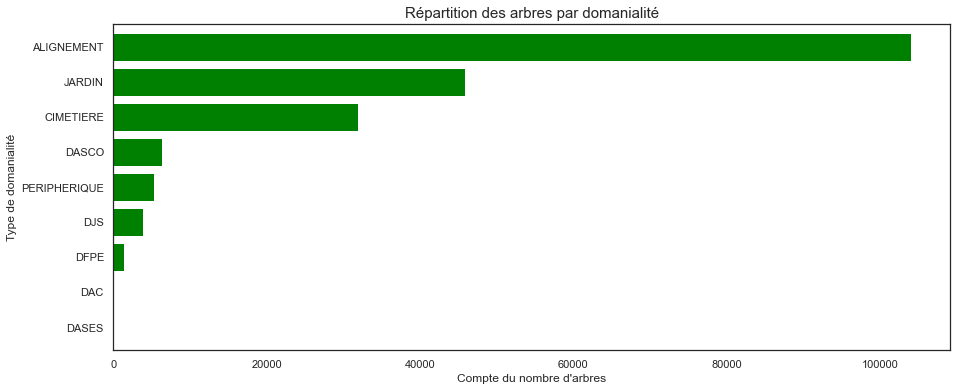

In [12]:
# Représentation graphique
plt.figure(figsize=(15,6))
df1["DOMANIALITE"].value_counts().sort_values().plot.barh(width=0.8, color="green")
plt.title("Répartition des arbres par domanialité", fontsize=15)
plt.ylabel("Type de domanialité", fontsize=12)
plt.xlabel("Compte du nombre d'arbres", fontsize=12)
plt.show()

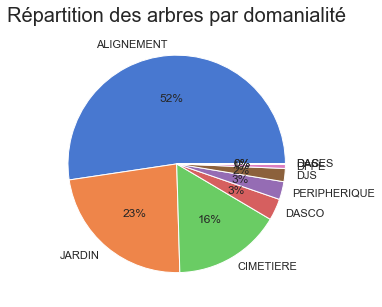

In [13]:
# Représentation graphique = diagramme circulaire
plt.figure(figsize=(10,5))
df1["DOMANIALITE"].value_counts().plot.pie(autopct="%1.0f%%")
plt.title("Répartition des arbres par domanialité", fontsize=20)
plt.ylabel("")
plt.show()

**<center><font color=red>Variable étudiée : ARRONDISSEMENT</font></center>**

> Pour rappel, nous avons observé pour cette variable :
- **25 valeurs uniques et aucune valeur manquante**.
<br><br>
Nous pouvons directement représenter les données dans un <font color=blue>diagramme en barres</font>.

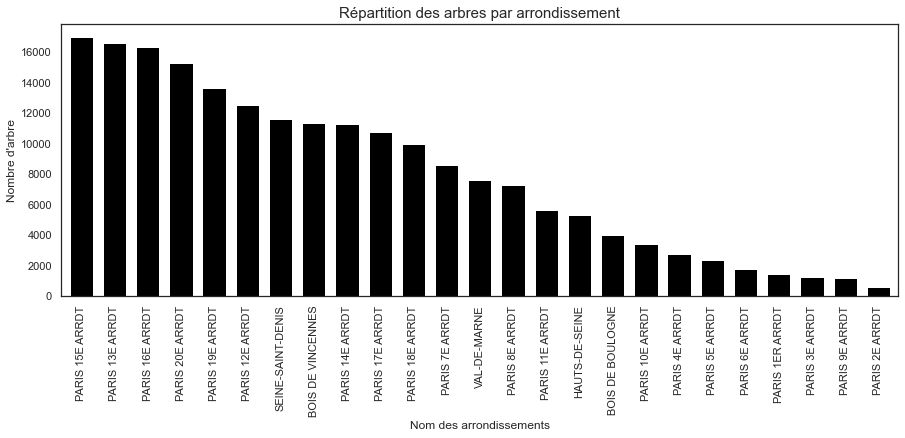

In [14]:
plt.figure(figsize=(15,5))
df1["ARRONDISSEMENT"].value_counts().plot.bar(width=0.7, color="black")
plt.title("Répartition des arbres par arrondissement", fontsize=15)
plt.xlabel("Nom des arrondissements", fontsize=12)
plt.ylabel("Nombre d'arbre", fontsize=12)
plt.show()

**<center><font color=red>Variable étudiée : STADE_DEVPT</font></center>**

>Nous avons observé :
- **4 valeurs uniques** ;
- 63098 lignes avec des valeurs manquantes.
<br><br>
Les valeurs uniques n'étant pas assez explicites, nous allons les clarifier en remplaçant leurs valeurs comme suit :
- J devient "1 - JEUNE" ;
- JA devient "2 - JEUNE ADULTE" ;
- A devient "3 - ADULTE" ;
- M devient "4 - MATURE". 
<br><br>
Nous allons également remplacer les <font color=blue>valeurs manquantes</font> par "**0 - Non spécifié**".
Nous n'allons pas les exclure car nous ne savons pas vraiment pourquoi ces données sont manquantes : nous n'allons pas nous privé de presque 1/3 (31,5%) des données.
<br><br>
Nous représenterons graphiquement les données par un <font color=blue>diagramme en bar</font>.

In [15]:
# Affichage des valeurs uniques
df1["STADE_DEVPT"].unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

In [16]:
# Remplacement des valeurs uniques par des valeurs plus explicites
df1["STADE_DEVPT"].replace({"J":"1 - JEUNE", "JA":"2 - JEUNE ADULTE", "A":"3 - ADULTE", \
                                   "M":"4 - MATURE"}, inplace=True)

# Remplacement des valeurs vides par "Non spécifié"
df1["STADE_DEVPT"].fillna("0 - Non Spécifié", inplace=True)
print(df1["STADE_DEVPT"].value_counts(dropna=False))

0 - Non Spécifié    66857
3 - ADULTE          64032
2 - JEUNE ADULTE    35048
1 - JEUNE           26604
4 - MATURE           6098
Name: STADE_DEVPT, dtype: int64


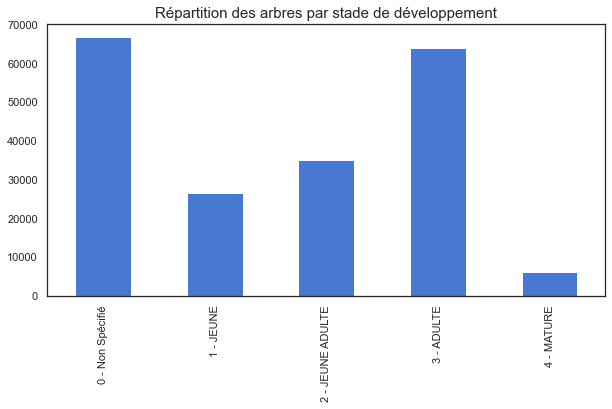

In [17]:
# Représentation graphique
plt.figure(figsize=(10,5))
df1["STADE_DEVPT"].value_counts().sort_index().plot.bar()
plt.title("Répartition des arbres par stade de développement", fontsize=15)
plt.show()

**<center><font color=red>Variable étudiée : REMARQUABLE</font></center>**

>La variable Remarquable est **atypique** car elle est de type "**float**" alors qu'elle devrait être de type "booléen" : soit la valeur est "Vraie", soit elle est "Fausse".
<br><br>
Tout comme on a fait pour la variable Stade de développement, nous allons <font color=blue>remplacer les valeurs</font> comme suit :
- **"0" devient "Non"** ;
- **"1" devient "Oui"** ;
- **les valeurs manquantes deviennent "Non spécifié"**.
<br><br>
Nous représenterons graphiquement les données par un <font color=blue>diagramme circulaire</font>.

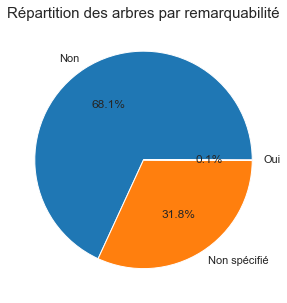

In [18]:
# Remplacement des 0 et 1 en Non et Oui
df1["REMARQUABLE"].replace({0:"Non", 1:"Oui"}, inplace=True)
df1["REMARQUABLE"].value_counts(dropna=False)

# Remplissage des vides avec "Non Spécifié"
df1["REMARQUABLE"].fillna("Non spécifié", inplace = True)

# Représentation graphique = diagramme circulaire
plt.figure(figsize=(5,5))
#colors = ['red', 'gold', 'yellowgreen', 'blue', 'lightcoral', 'lightskyblue']
        # ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
colors = ["#1f77b4", "#ff7f0e", "#d62728"]
df1["REMARQUABLE"].value_counts().plot.pie(colors=colors, autopct="%1.1f%%")
plt.title("Répartition des arbres par remarquabilité", fontsize=15)
plt.ylabel("")
plt.show()

**<center>Mais combien avons-nous exactement d'arbres remarquables ?</center>**

In [19]:
# Création d'un filtre sur les arbres remarquables
rmqbl_masque = df1["REMARQUABLE"] == "Oui"
filtered_df = df1[rmqbl_masque]
print("Nous avons " + str(filtered_df.shape[0]) + " arbres remarquables")

Nous avons 183 arbres remarquables


**<center><font color=red>Variables étudiées : LATITUDE et LONGITUDE</font></center>**

> Ces variables sont difficiles à analyser de manière isolée, mais comme leur combinaison est une **coordonnée géographique**, elles peuvent servir à localiser géographiquement des arbres sur **une carte** grâce à la librairie <code>**Folium**</code>.
<br><br>
Néanmoins, une carte avec environ 200.000 arbres à localiser serait illisible. 
<br><br>
Faisons un test avec les **183 ces arbres remarquables** de la ville.

In [20]:
import folium

# Définition du point clé d'ouverture de la carte
paris = folium.Map(location = [48.85, 2.35])

# Ajout d'un marqueur pour chaque arbre remarquable, avec son nom
for i in range(0,len(filtered_df)):
    folium.Marker(
        location = [filtered_df.iloc[i]["LATITUDE"], filtered_df.iloc[i]["LONGITUDE"]],
        popup = str(filtered_df.iloc[i]["LIBELLE_FR"].encode("latin-1")),
        icon = folium.Icon(icon_color="white")
    ).add_to(paris)

# Création des limites de zoom de la carte
sud_ouest = filtered_df[["LATITUDE","LONGITUDE"]].min().values.tolist()
nord_est = filtered_df[["LATITUDE","LONGITUDE"]].max().values.tolist()

# Appel du zoom maximum possible
paris.fit_bounds([sud_ouest,nord_est])

# Appel de la carte
paris

Nous en avons fini avec les variables qualitatives, passons maintenant aux variables quantitatives.

### <center><font color=purple>2.2.1 - Nettoyage des données QUANTITATIVES</font></center>

**<center><font color=red>Variables étudiées : CIRCONF_CM et HAUTEUR_M</font></center>**

La librairie **<code>Pandas</code>** nous permet d'affficher des <font color=blue>indicateurs statistiques de base</font> pour les variables quantitatives avec la méthode <code>describe()</code>. <br>Ci-dessous une explication succinte de leur signification :
- **count** : comptage des valeurs non-nulles ;
- **unique** : comptage distinct des valeurs uniques ;
- **mean** : la moyenne (somme de toutes les données divisée par leur nombre) ;
- **std** : l'écart-type (mesure de la dispersion d'un ensemble de valeurs autour de la moyenne ;
    - *Plus l'écart-type est faible, plus la population est homogène* ;
- **min** : la valeur minimum ;
- **25%** : le 1er quartile (valeur au dessus de laquelle se situent 75% des individus) ;
- **50%** : le 2nd quartile ou médiane (valeur au dessus de laquelle se situent 50% des individus)  ;
- **75%** : le 3e quartile (valeur au dessus de laquelle se situent 25% des individus) ;
- **max** : la valeur maximum.

***NOTE*** *: les **quartiles** sont les 3 valeurs qui partagent une distribution en quatre parties égales, ils font partie des* ***quantiles.***

In [21]:
# Filtre sur les 2 colonnes qui nous intéresses
variable_num = ["CIRCONF_CM","HAUTEUR_M"]
round(df1[variable_num].describe(),2)

,CIRCONF_CM,HAUTEUR_M
count,198639.00,198639.00
mean,83.56,13.16
std,675.69,1978.64
min,0.00,0.00
25%,30.00,5.00
50%,70.00,8.00
75%,115.00,12.00
max,250255.00,881818.00


> Nous notons que :
- la **plus petite valeur pour chacune des 2 variables est "0"**; dans les 2 cas, cela veut dire que l'arbre n'existe pas !
- pour la circonférence, la **plus grande valeur est 250.255 cm**, c'est-à-dire, plus de 2,5km de circonférence !
- pour la hauteur, la **plus grande valeur est 881.818 m**, c'est-à-dire, plus de 881km de hauteur !
<br><br>
Il est évident que nous avons affaire à des <font color=blue>valeurs aberrantes</font> qu'il faudrait traiter, soit en les corrigeant, soit en les éliminant. En effet, ces valeurs faussent les autres indicateurs statistiques qui ont été calculés.

>Question méthodologie, nous allons d'abord procéder à un <font color=blue>nettoyage métier</font>, puis compléter notre analyse par un <font color=blue>nettoyage statistique</font> si nécessaire.
<br><br>
On entent par **"nettoyage métier"** la suppression des **valeurs aberrantes**, grâce à une connaissance métier, venue de l'extérieur (connaissance de l'équipe ou la personne qui a créé la base de données, recherche Internet, etc.).<br>
On entend par **"nettoyage statistique"**, le repérage des **valeurs atypiques ou rares** par l'utilisation d'une méthode statistique.

>**<center><font color=red>Nettoyage "métier"</font></center>**
<br>
Si l'on se réfère à l'article suivant : <a>[Les arbres remarquables (Crédits : pariszigzag.fr - 2017)](https://www.pariszigzag.fr/secret/lieux-insolites/arbres-remarquables-paris)</a>, un platane d'Orient du Parc Monceau (8e arrondissement) affiche <font color=blue>la plus grande circonférence </font>: **8 mètres, soit 800 centimètres**.
<br><br>
De même, si l'on se réfère à l'article suivant : <a>[Le plus grand arbre de Paris (Crédits : agriculture.gouv.fr - Mars 2019)](https://agriculture.gouv.fr/le-plus-grand-arbre-de-paris-veille-sur-le-78-rue-de-varenne)</a>, <font color=blue>l'arbre le plus grand de Paris</font> - un platane d'Orient du jardin de l’hôtel de Villeroy (7e arrondissement), mesure **30 mètres de haut**.
<br><br>
Nous allons appliquer ces limites à nos données : notre nouveau dataframe s'appellera **<font color=red>df_metier</font>**.

In [22]:
# Analyse de la distribution des variables - connaissance métier
df_metier = df1[((df1["CIRCONF_CM"] > 0) & (df1["CIRCONF_CM"] <= 800)) \
                & ((df1["HAUTEUR_M"] > 0) & (df1["HAUTEUR_M"] <= 30))]

# Filtre sur les 2 colonnes qui nous intéresses
variable_num = ["CIRCONF_CM","HAUTEUR_M"]
round(df_metier[variable_num].describe(),2)

,CIRCONF_CM,HAUTEUR_M
count,158555.00,158555.00
mean,92.63,10.38
std,58.76,5.12
min,1.00,1.00
25%,50.00,6.00
50%,80.00,10.00
75%,125.00,14.00
max,790.00,30.00


**<center><font color=red>Nettoyage "statistique"</font></center>**
<br>
Le nettoyage statistique utilise une **mesure de dispersion** nommée <font color=blue>l'écart interquartile</font> (EI ou *IQR pour InterQuartile Range en anglais*) afin de déterminer des limites basse et haute de la variable étudiée, et permet ainsi d'exclure les variables au-delà de ces limites. 
<br><br>
L'**IQR** se calcule en faisant la différence entre le 3e et le 1er quartile (**Q3 - Q1**), la **limite basse** par la différence entre le 1er quartile et 1,5 fois l'IQR (**Q1 - 1,5 IQR**), la **limite haute** par l'addition de 1,5 fois l'IQR au 3e quartile (**Q3 + 1,5 IQR**).

In [23]:
# Calcul des indicateurs pour la circonférence
Q1_circ = round(df_metier["CIRCONF_CM"]. quantile(0.25),1) # Calcul du 1er quartile
Q3_circ = round(df_metier["CIRCONF_CM"]. quantile(0.75),1) # Calcul du 3e quartile
IQR_circ = round(Q3_circ - Q1_circ,1) # Computer l'IQR (InterQuartile Range)
bas_circ = round(Q1_circ -(1.5 * IQR_circ),1)
haut_circ = round(Q3_circ +(1.5 * IQR_circ),1)

print("Pour la série des circonférences :\n"
      + "1er quartile :" + str(Q1_circ) + "\n"
      + "3e quartile :"+ str(Q3_circ) + "\n"
      + "IQR :"+ str(IQR_circ) + "\n"
      + "Limite basse :"+ str(bas_circ) + "\n"
      + "Limite haute :"+ str(haut_circ))

# Calcul des indicateurs pour la hauteur
Q1_htr = round(df_metier["HAUTEUR_M"]. quantile(0.25),1) # Calcul du 1er quartile
Q3_htr = round(df_metier["HAUTEUR_M"]. quantile(0.75),1) # Calcul du 3e quartile
IQR_htr = round(Q3_htr - Q1_htr,1) # Computer l'IQR (InterQuartile Range)
bas_htr = round(Q1_htr -(1.5 * IQR_htr),1)
haut_htr = round(Q3_htr +(1.5 * IQR_htr),1)
print("-------------------------------------")
print("Pour la série des hauteurs :\n"
      + "1er quartile :" + str(Q1_htr) + "\n"
      + "3e quartile :"+ str(Q3_htr) + "\n"
      + "IQR :"+ str(IQR_htr) + ".\n"
      + "Limite basse :"+ str(bas_htr) + "\n"
      + "Limite haute :"+ str(haut_htr))

Pour la série des circonférences :
1er quartile :50.0
3e quartile :125.0
IQR :75.0
Limite basse :-62.5
Limite haute :237.5
-------------------------------------
Pour la série des hauteurs :
1er quartile :6.0
3e quartile :14.0
IQR :8.0.
Limite basse :-6.0
Limite haute :26.0


> Appliquons cette méthode statistique à nos données métier: le dataframe s'appelera **<code><font color=red>df_stat</font></code>**.

In [24]:
# Analyse de la distribution des variables - connaissance métier
df_stat = df_metier[((df_metier["CIRCONF_CM"] > 0) & (df_metier["CIRCONF_CM"] <= haut_circ)) \
                & ((df_metier["HAUTEUR_M"] > 0) & (df_metier["HAUTEUR_M"] <= haut_htr))]

# Filtre sur les 2 colonnes qui nous intéresses
variable_num = ["CIRCONF_CM","HAUTEUR_M"]
round(df_stat[variable_num].describe(),2)

,CIRCONF_CM,HAUTEUR_M
count,154664.00,154664.0
mean,88.03,10.1
std,50.87,4.8
min,1.00,1.0
25%,48.00,6.0
50%,80.00,10.0
75%,120.00,14.0
max,237.00,26.0


> Ce nettoyage nous renseigne sur les **valeurs rares** des circonférences et des hauteurs de nos arbres :
- Une circonférence au-delà de **237 centimètres** est considérée comme **rare** ;
- Une hauteur au-delà de **26 mètres** est considérée comme **rare**.

>Nous allons <font color=blue>représenter graphiquement</font> la distribution de nos variables grâce à un graphique appelé **boîte à moustaches** (*boxplot en anglais*), qui résume la répartition de nos observations, et ce, pour :
- La distribution des valeurs **sans traitement** ;
- La distribution des valeurs **avec le nettoyage métier**;
- La distribution des valeurs **avec le nettoyage statistique**.

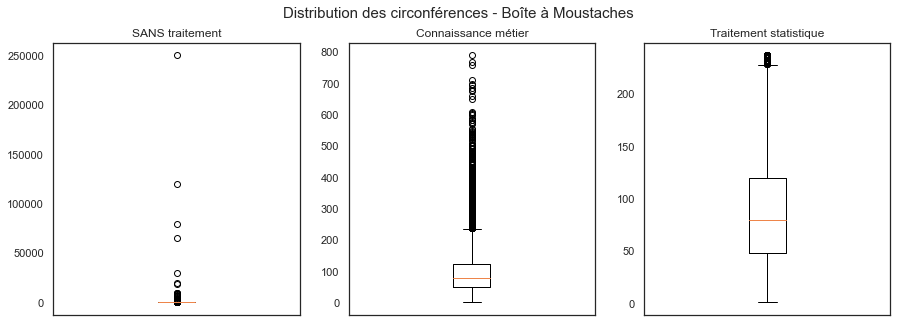

In [25]:
# Représentation graphique de la circonférence
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
fig.suptitle("Distribution des circonférences - Boîte à Moustaches", fontsize=15)

axes[0].boxplot(df1["CIRCONF_CM"])
axes[0].set_title("SANS traitement", fontsize=12)
axes[0].set_xticklabels("")

axes[1].boxplot(df_metier["CIRCONF_CM"])
axes[1].set_title("Connaissance métier", fontsize=12)
axes[1].set_xticklabels("")

axes[2].boxplot(df_stat["CIRCONF_CM"])
axes[2].set_title("Traitement statistique", fontsize=12)
axes[2].set_xticklabels("")

plt.show()

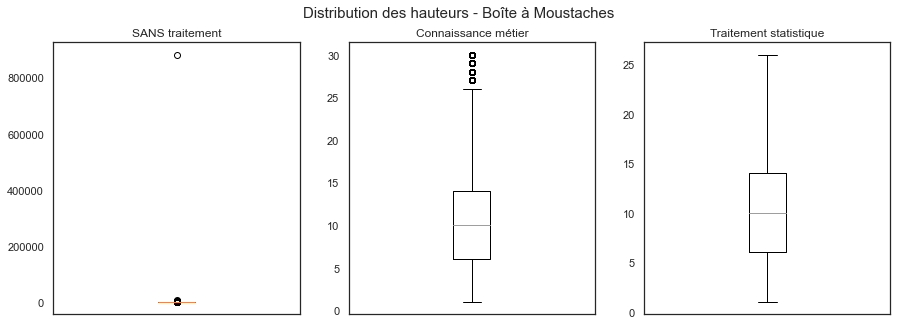

In [26]:
# Représentation graphique de la circonférence
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
fig.suptitle("Distribution des hauteurs - Boîte à Moustaches", fontsize=15)

axes[0].boxplot(df1["HAUTEUR_M"])
axes[0].set_title("SANS traitement", fontsize=12)
axes[0].set_xticklabels("")

axes[1].boxplot(df_metier["HAUTEUR_M"])
axes[1].set_title("Connaissance métier", fontsize=12)
axes[1].set_xticklabels("")

axes[2].boxplot(df_stat["HAUTEUR_M"])
axes[2].set_title("Traitement statistique", fontsize=12)
axes[2].set_xticklabels("")

plt.show()

Si le nettoyage statistique nous permet de visualiser les limites de nos données en excluant les **valeurs rares**, l'objectif ici n'est pas de les exclure mais bien **d'aider la ville de Paris à les identifier pour mieux les entretenir**.

Nous gardons donc notre *DataFrame* **<code><font color=red>df_metier</font></code>** pour la suite de notre analyse.

Une autre façon de voir rapidement la répartition de nos variables est de les <font color=blue>représenter graphiquement avec un **histogramme**</font> : ce type de graphique décrit le nombre d'individus observés par plage de valeurs de la variable.

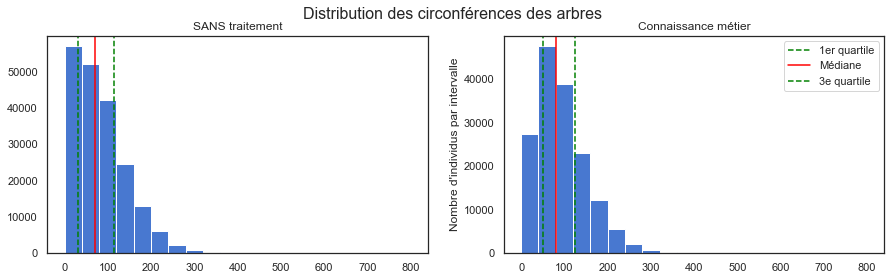

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharex=True)
range = (0, 800)
bins = 20
           
med_circ0 = np.percentile(df1["CIRCONF_CM"], 50)
q1_circ0 = np.percentile(df1["CIRCONF_CM"], 25)
q3_circ0 = np.percentile(df1["CIRCONF_CM"], 75)

med_circ1 = np.percentile(df_metier["CIRCONF_CM"], 50)
q1_circ1 = np.percentile(df_metier["CIRCONF_CM"], 25)
q3_circ1 = np.percentile(df_metier["CIRCONF_CM"], 75)

axs[0].hist(df1["CIRCONF_CM"], range = range, bins = bins)
axs[0].title.set_text("SANS traitement")
axs[0].axvline(q1_circ0, linestyle="--", color="green")
axs[0].axvline(med_circ0, linestyle="-",  color="red")
axs[0].axvline(q3_circ0, linestyle="--", color="green")

axs[1].hist(df_metier["CIRCONF_CM"], range = range, bins = bins)
axs[1].title.set_text("Connaissance métier")
axs[1].axvline(q1_circ1, linestyle="--", color="green")
axs[1].axvline(med_circ1, linestyle="-",  color="red")
axs[1].axvline(q3_circ1, linestyle="--", color="green")


fig.suptitle("Distribution des circonférences des arbres", fontsize=16)
plt.ylabel("Nombre d'individus par intervalle")
plt.legend({"1er quartile":q1_circ1, "Médiane":med_circ1, "3e quartile":q3_circ1})
plt.show()

Pour les hauteurs, nous allons également analyser la distribution de nos arbres avec un histogramme.

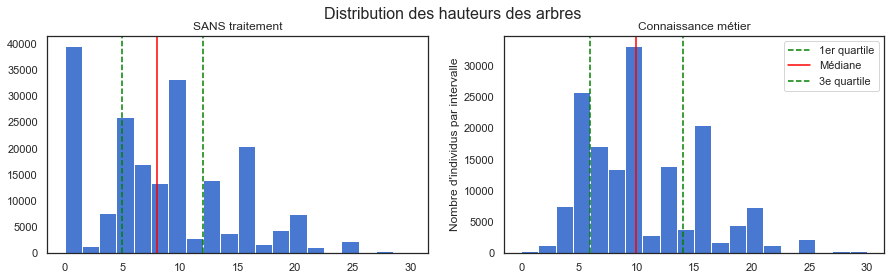

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharex=True)
range = (0, 30)
bins = 20
           
med_circ0 = np.percentile(df1["HAUTEUR_M"], 50)
q1_circ0 = np.percentile(df1["HAUTEUR_M"], 25)
q3_circ0 = np.percentile(df1["HAUTEUR_M"], 75)

med_circ1 = np.percentile(df_metier["HAUTEUR_M"], 50)
q1_circ1 = np.percentile(df_metier["HAUTEUR_M"], 25)
q3_circ1 = np.percentile(df_metier["HAUTEUR_M"], 75)

axs[0].hist(df1["HAUTEUR_M"], range = range, bins = bins)
axs[0].title.set_text("SANS traitement")
axs[0].axvline(q1_circ0, linestyle="--", color="green")
axs[0].axvline(med_circ0, linestyle="-",  color="red")
axs[0].axvline(q3_circ0, linestyle="--", color="green")

axs[1].hist(df_metier["HAUTEUR_M"], range = range, bins = bins)
axs[1].title.set_text("Connaissance métier")
axs[1].axvline(q1_circ1, linestyle="--", color="green")
axs[1].axvline(med_circ1, linestyle="-",  color="red")
axs[1].axvline(q3_circ1, linestyle="--", color="green")


fig.suptitle("Distribution des hauteurs des arbres", fontsize=16)
plt.ylabel("Nombre d'individus par intervalle")
plt.legend({"1er quartile":q1_circ1, "Médiane":med_circ1, "3e quartile":q3_circ1})
plt.show()

Nous allons <font color=blue>représenter ces variables quantitatives avec la fonction "**distplot**"</font> de la librairie **<code>Seaborn</code>** : elle permet de visualiser l'**histogramme d'un échantillon avec l'estimation de sa densité**.

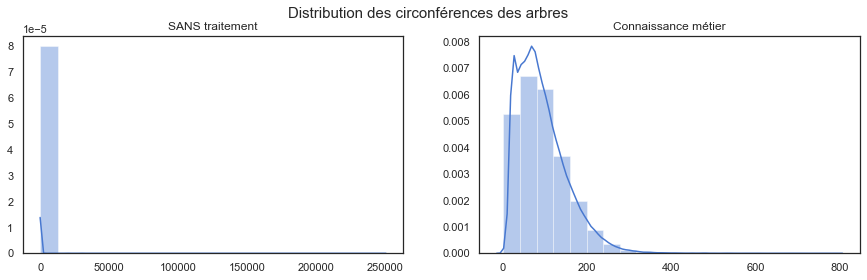

In [29]:
# Création de la figure
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Tracé des distplot
sns.distplot(df1["CIRCONF_CM"], bins = 20, ax=ax1)
sns.distplot(df_metier["CIRCONF_CM"], bins = 20, ax=ax2)

# Mise en forme des titres et labels
plt.suptitle("Distribution des circonférences des arbres", fontsize=15)
ax1.set_title("SANS traitement")
ax1.set_xlabel("")
ax2.set_title("Connaissance métier")
ax2.set_xlabel("")

plt.show()

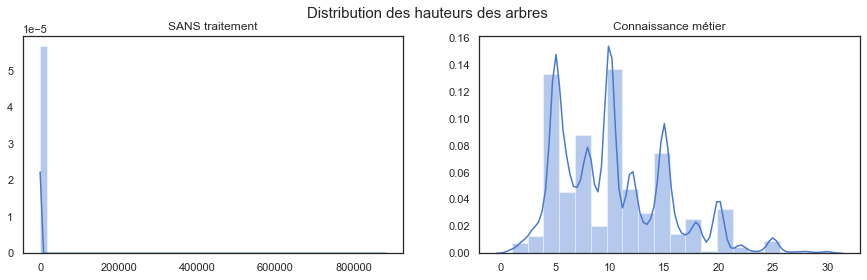

In [30]:
# Création de la figure
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Tracé des distplot
sns.distplot(df1["HAUTEUR_M"], ax=ax1)
sns.distplot(df_metier["HAUTEUR_M"], bins = 20, ax=ax2)

# Mise en forme des titres et labels
plt.suptitle("Distribution des hauteurs des arbres", fontsize=15)
ax1.set_title("SANS traitement")
ax1.set_xlabel("")
ax2.set_title("Connaissance métier")
ax2.set_xlabel("")

plt.show()

## <center><font color=red>PARTIE 3 - Synthèse de l'analyse</font></center>

Maintenant que nous avons bien exploré notre jeu de données, nous pouvons en faire une synthèse fiable.

Pour cela nous allons afficher une dernière fois quelques indicateurs.

In [31]:
print("Le jeu de données considéré comme fiable représente " \
      + str(round(len(df_metier)/len(df0)*100,0)) + " % du jeu de données initial.")

Le jeu de données considéré comme fiable représente 79.0 % du jeu de données initial.


In [32]:
# Description des variables qualitatives
variable_quali = ["LIBELLE_FR","STADE_DEVPT","REMARQUABLE","DOMANIALITE","ARRONDISSEMENT"]
df_metier[variable_quali].describe()

,LIBELLE_FR,STADE_DEVPT,REMARQUABLE,DOMANIALITE,ARRONDISSEMENT
count,158555,158555,158555,158555,158555
unique,169,5,3,9,25
top,Platane,3 - ADULTE,Non,ALIGNEMENT,PARIS 16E ARRDT
freq,39139,62628,125864,98619,14895


In [33]:
resume = df_metier["LIBELLE_FR_NEW"]
comptage = resume.value_counts()
pourcent100 = resume.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Compte': comptage, 'par100': pourcent100})

,Compte,par100
Autres,41912,26.4%
Platane,39139,24.7%
Marronnier,22757,14.4%
Tilleul,17414,11.0%
Erable,12428,7.8%
Sophora,10427,6.6%
Frêne,3460,2.2%
Micocoulier,3266,2.1%
Chêne,2729,1.7%
Pin,2715,1.7%


In [34]:
resume = df_metier["DOMANIALITE"]
comptage = resume.value_counts()
pourcent100 = resume.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Compte': comptage, 'par100': pourcent100})

,Compte,par100
ALIGNEMENT,98619,62.2%
JARDIN,26622,16.8%
CIMETIERE,16928,10.7%
DASCO,6333,4.0%
PERIPHERIQUE,5123,3.2%
DJS,3649,2.3%
DFPE,1256,0.8%
DAC,21,0.0%
DASES,4,0.0%


In [35]:
resume = df_metier["ARRONDISSEMENT"]
comptage = resume.value_counts()
pourcent100 = resume.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Compte': comptage, 'par100': pourcent100})

,Compte,par100
PARIS 16E ARRDT,14895,9.4%
PARIS 13E ARRDT,13474,8.5%
PARIS 20E ARRDT,12817,8.1%
PARIS 12E ARRDT,11949,7.5%
PARIS 15E ARRDT,11256,7.1%
PARIS 14E ARRDT,11164,7.0%
PARIS 19E ARRDT,10177,6.4%
PARIS 17E ARRDT,8605,5.4%
PARIS 7E ARRDT,8363,5.3%
PARIS 18E ARRDT,8329,5.3%


In [36]:
resume = df_metier["STADE_DEVPT"]
comptage = resume.value_counts()
pourcent100 = resume.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Compte': comptage, 'par100': pourcent100})

,Compte,par100
3 - ADULTE,62628,39.5%
2 - JEUNE ADULTE,34155,21.5%
0 - Non Spécifié,29687,18.7%
1 - JEUNE,26060,16.4%
4 - MATURE,6025,3.8%


In [37]:
resume = df_metier["REMARQUABLE"]
comptage = resume.value_counts()
pourcent100 = resume.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Compte': comptage, 'par100': pourcent100})

,Compte,par100
Non,125864,79.4%
Non spécifié,32520,20.5%
Oui,171,0.1%


In [38]:
# Filtre sur les 2 colonnes qui nous intéresses
variable_num = ["CIRCONF_CM","HAUTEUR_M"]
round(df_metier[variable_num].describe(),2)

,CIRCONF_CM,HAUTEUR_M
count,158555.00,158555.00
mean,92.63,10.38
std,58.76,5.12
min,1.00,1.00
25%,50.00,6.00
50%,80.00,10.00
75%,125.00,14.00
max,790.00,30.00


**<center><font color=green>EN SYNTHESE FINALE</center></font>**

***

On peut conclure que le **patrimoine arboré de la ville de Paris** présente les caractéristiques suivantes :
- On répertorie **158.555 arbres** avec les données les plus **pertinentes** possibles ;
- Il y a **169 types d'arbres** : celui le plus représenté est le **Platane**, comptant 39.139 individus (24,5% de la population totale) ;
- Ces arbres sont plantés principalement en **"Alignement"** (62%), c'est-à-dire, le long des voies publiques, puis dans les **jardins publiques** (17%) ;
- Le **16e arrondissement** regroupe la majorité de la population arborée (9,4%) sur un total de **25 arrondissements** ;
- Les arbres sont majoritairement **adulte** (quasi 40%), même si on a 19% d'individus dont le stade de développement n'est pas spécifié ;
- Les arbres remarquables quant à eux totalisent **171 individus** ;
- Ces arbres font **en moyenne 10 mètres de hauteur et 92 centimètres de circonférence** ;
- Il y a autant d'individus qui fait **moins de et plus de 10 mètres de hauteur** ;
- Il y a autant d'individus qui fait **moins de et plus de 80 centimètres de circonférence**.

***

Par la connaissance de toutes ses caractéristiques, la ***Direction des Espaces Verts et de l'Environnement*** pourra monter une stratégie d'optimisation des tournées : 
- par le **choix du type d'entretien** (élagage ; abattement des arbres dépérissants ou dangereux ; remplacement des arbres vieillissants ou malades);
- la **détermination des fréquences des entretiens et l'allocation de ressources spécifiques** en fonction du type d'arbres, de son stade de développement et de sa qualité d'arbre "remarquable" ou non ;
- par **la création de routine de tournées** grâce à leur localisation ;
- etc.

Tout dépendra évidemment **des objectifs et des priorités définis** par la ville dans son programme "**Végétalisons la ville**". 

Une stratégie à réfléchir serait d'essayer de végataliser un peu plus les arrondissements les moins fournis en arbres.

***

**<center>FIN DE L'ANALYSE</center>**